<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/Sujair/10-Energy/Nb_10_Energy_model_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving Renewable_Energy_Production_and_Consumption.xlsx to Renewable_Energy_Production_and_Consumption.xlsx


In [ ]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [3]:
# Read Excel file
df = pd.read_excel("Renewable_Energy_Production_and_Consumption.xlsx")

# Save as CSV
df.to_csv("Renewable_Energy_Production_and_Consumption.csv", index=False)

print("Conversion completed!")
df.head(10)

Conversion completed!


,Country,Year,Total_Energy_Consumed_GWh,Solar_Energy_Produced_GWh,Wind_Energy_Produced_GWh,Hydro_Energy_Produced_GWh,Other_Renewable_Energy_GWh,Non_Renewable_Energy_GWh,CO2_Emissions_Metric_Tons
0,Country_1,2015,285762.2,10402.0,47563.9,39218.1,629.8,18276.5,762386.0
1,Country_1,2016,94908.5,29474.2,49938.8,24416.0,1237.7,51278.9,107060.4
2,Country_1,2017,215680.6,25793.2,19221.1,22064.3,4221.1,194503.8,585307.5
3,Country_1,2018,218026.3,20533.4,15641.4,1540.4,1962.8,196055.3,814390.1
4,Country_1,2019,113048.8,6861.9,43059.4,46401.3,4079.8,134436.3,339605.5
5,Country_2,2015,131187.7,21418.7,49932.0,30562.1,6467.7,177220.3,642962.4
6,Country_2,2016,258699.6,4565.4,31852.4,10954.5,5698.8,50652.7,702010.1
7,Country_2,2017,240451.3,5839.7,39961.9,46060.6,2696.2,194688.0,689522.2
8,Country_2,2018,132274.0,21379.9,39305.5,45831.7,3766.3,37129.1,501264.7
9,Country_2,2019,183489.1,15963.7,18411.6,49470.0,6333.3,29213.8,411920.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     250 non-null    object 
 1   Year                        250 non-null    int64  
 2   Total_Energy_Consumed_GWh   250 non-null    float64
 3   Solar_Energy_Produced_GWh   250 non-null    float64
 4   Wind_Energy_Produced_GWh    250 non-null    float64
 5   Hydro_Energy_Produced_GWh   250 non-null    float64
 6   Other_Renewable_Energy_GWh  250 non-null    float64
 7   Non_Renewable_Energy_GWh    250 non-null    float64
 8   CO2_Emissions_Metric_Tons   250 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 17.7+ KB


In [5]:
df.describe()

,Year,Total_Energy_Consumed_GWh,Solar_Energy_Produced_GWh,Wind_Energy_Produced_GWh,Hydro_Energy_Produced_GWh,Other_Renewable_Energy_GWh,Non_Renewable_Energy_GWh,CO2_Emissions_Metric_Tons
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2017.000000,176274.529200,25690.261600,24997.231200,26051.252000,5227.685600,102906.343200,541909.587600
std,1.417051,72464.074088,14117.501535,14828.215517,14717.285994,2734.519402,55836.281851,251071.704262
min,2015.000000,51093.500000,1192.500000,1007.700000,1183.500000,578.900000,10228.700000,102274.800000
25%,2016.000000,113154.350000,14306.675000,11844.450000,13406.025000,2996.675000,52062.250000,321853.900000
50%,2017.000000,169476.000000,25035.100000,24701.450000,25251.050000,5157.950000,99237.300000,539561.000000
75%,2018.000000,240156.525000,39043.350000,38112.525000,39847.250000,7650.075000,150347.025000,767639.450000
max,2019.000000,297547.900000,49967.400000,49938.800000,49891.400000,9987.600000,199678.300000,985616.300000


In [6]:
missing_vals=df.isnull().sum()
missing_vals

,0
Country,0
Year,0
Total_Energy_Consumed_GWh,0
Solar_Energy_Produced_GWh,0
Wind_Energy_Produced_GWh,0
Hydro_Energy_Produced_GWh,0
Other_Renewable_Energy_GWh,0
Non_Renewable_Energy_GWh,0
CO2_Emissions_Metric_Tons,0


In [8]:
target = "CO2_Emissions_Metric_Tons"
X = df.drop(columns=["Country", target])
y = df[target]
numeric_df = df.drop(columns=["Country"])

In [9]:
df.columns

Index(['Country', 'Year', 'Total_Energy_Consumed_GWh',
       'Solar_Energy_Produced_GWh', 'Wind_Energy_Produced_GWh',
       'Hydro_Energy_Produced_GWh', 'Other_Renewable_Energy_GWh',
       'Non_Renewable_Energy_GWh', 'CO2_Emissions_Metric_Tons'],
      dtype='object')

# XG Boost

XGBoost Regressor – Test Results
RMSE: 249988.9806
MAE : 206287.7949
R²  : -0.0788


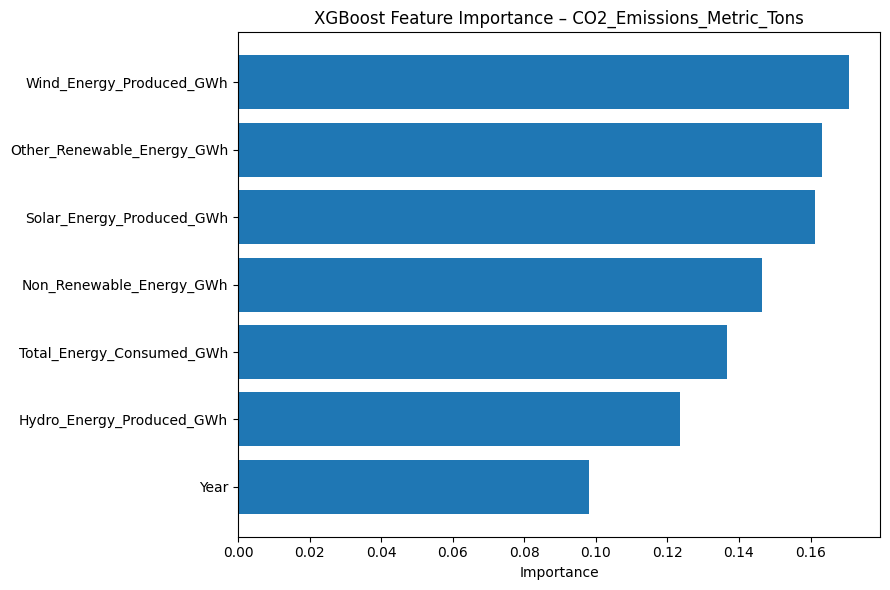

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor

# ==============================
# Split features and target
# ==============================
X = numeric_df.drop(target, axis=1)
y = numeric_df[target]


# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# XGBoost Regressor
# ==============================
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
test_pred = model.predict(X_test)


# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("XGBoost Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Feature Importance Plot
# ==============================
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance – CO2_Emissions_Metric_Tons")
plt.tight_layout()
plt.show()

# Random Forest

Random Forest Regressor – Test Results
RMSE: 243105.2460
MAE : 207141.9947
R²  : -0.0202


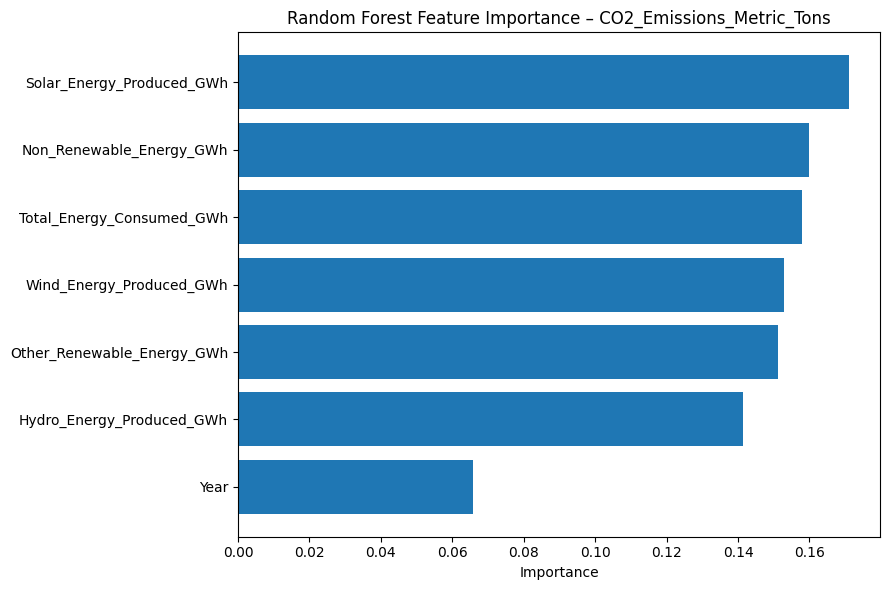

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

# ==============================
# Split features and target
# ==============================
X = numeric_df.drop(target, axis=1)
y = numeric_df[target]


# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# Random Forest Regressor
# ==============================
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

rf_model.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
y_pred = rf_model.predict(X_test)


# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Feature Importance Plot
# ==============================
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance – CO2_Emissions_Metric_Tons")
plt.tight_layout()
plt.show()

# CNN

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

import numpy as np

# ------------------------------
# Prepare Dataset
# ------------------------------
class WeatherDataset(Dataset):
    def __init__(self, df):
        self.X = df.drop(target, axis=1).values.astype(np.float32)
        self.y = df[target].values.astype(np.float32).reshape(-1, 1)

        # Add channel dimension for CNN: (samples, channels, features)
        self.X = np.expand_dims(self.X, axis=1)  # channels=1

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx]), torch.tensor(self.y[idx])


dataset = WeatherDataset(numeric_df)

# Train-test split: 80/20
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

# ------------------------------
# Define CNN Model
# ------------------------------
class TabularCNN(nn.Module):
    def __init__(self, num_features):
        super(TabularCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=2)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(16, 32, kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear((num_features - 2) * 32, 64)  # adjust based on conv output
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


num_features = numeric_df.drop(target, axis=1).shape[1]
model = TabularCNN(num_features)

# ------------------------------
# Loss & Optimizer
# ------------------------------
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ------------------------------
# Train Loop
# ------------------------------
epochs = 200
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


# ------------------------------
# Evaluation
# ------------------------------
model.eval()
y_preds, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_preds.append(outputs.numpy())
        y_true.append(y_batch.numpy())

y_preds = np.vstack(y_preds)
y_true = np.vstack(y_true)

rmse = np.sqrt(np.mean((y_true - y_preds)**2))
mae = np.mean(np.abs(y_true - y_preds))
r2 = 1 - np.sum((y_true - y_preds)**2) / np.sum((y_true - np.mean(y_true))**2)

print("\nCNN Regression Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Epoch [20/200], Loss: 78439350272.0000
Epoch [40/200], Loss: 77545714319.3600
Epoch [60/200], Loss: 77015032709.1200
Epoch [80/200], Loss: 76888781783.0400
Epoch [100/200], Loss: 76079480258.5600
Epoch [120/200], Loss: 74593110179.8400
Epoch [140/200], Loss: 75646161879.0400
Epoch [160/200], Loss: 73937939169.2800
Epoch [180/200], Loss: 74393610813.4400
Epoch [200/200], Loss: 73377372487.6800

CNN Regression Test Results
RMSE: 249503.7500
MAE : 211603.5156
R²  : -0.0306


# SVM

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [15]:
# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# SVR Model
# -----------------------------
svr_model = SVR(
    kernel='rbf',    # radial basis function (non-linear)
    C=100,           # regularization
    epsilon=0.1,     # insensitive loss
    gamma='scale'    # automatic gamma
)

# Train
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svr_model.predict(X_test_scaled)

# -----------------------------
# Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR Regression – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

SVR Regression – Test Results
RMSE: 242618.4002
MAE : 211747.8984
R²  : -0.0161


Decision Tree Regressor – Test Results
RMSE: 281418.8379
MAE : 215276.9420
R²  : -0.3671


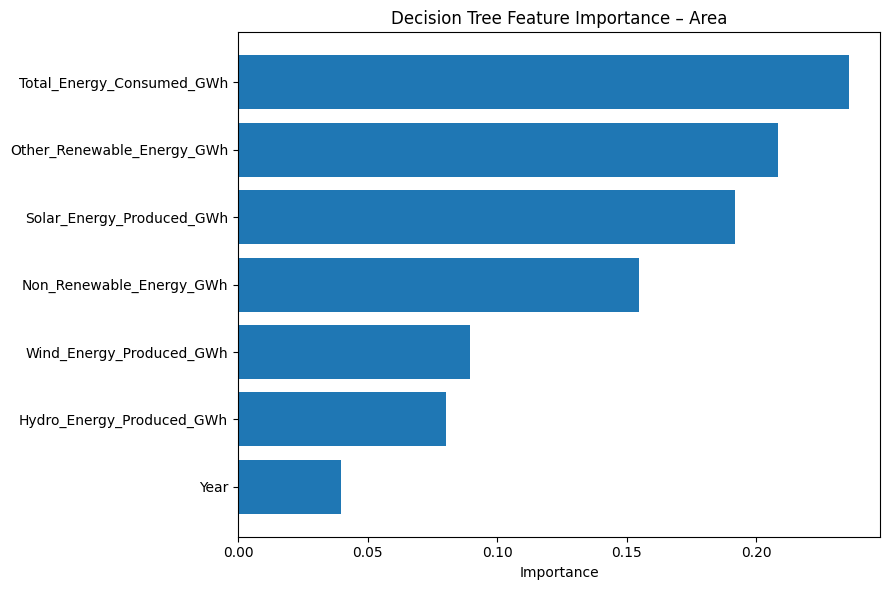

In [16]:
from sklearn.tree import DecisionTreeRegressor

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# Decision Tree Regressor
# -----------------------------
dt_model = DecisionTreeRegressor(
    max_depth=None,        # can tune for overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train
dt_model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = dt_model.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

# -----------------------------
# Feature Importance Plot
# -----------------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importance – Area")
plt.tight_layout()
plt.show()

# EBM

In [17]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 16.7 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=40

In [18]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

Explainable Boosting Regressor – Test Results
RMSE: 237493.9846
MAE : 203131.8441
R²  : 0.0263


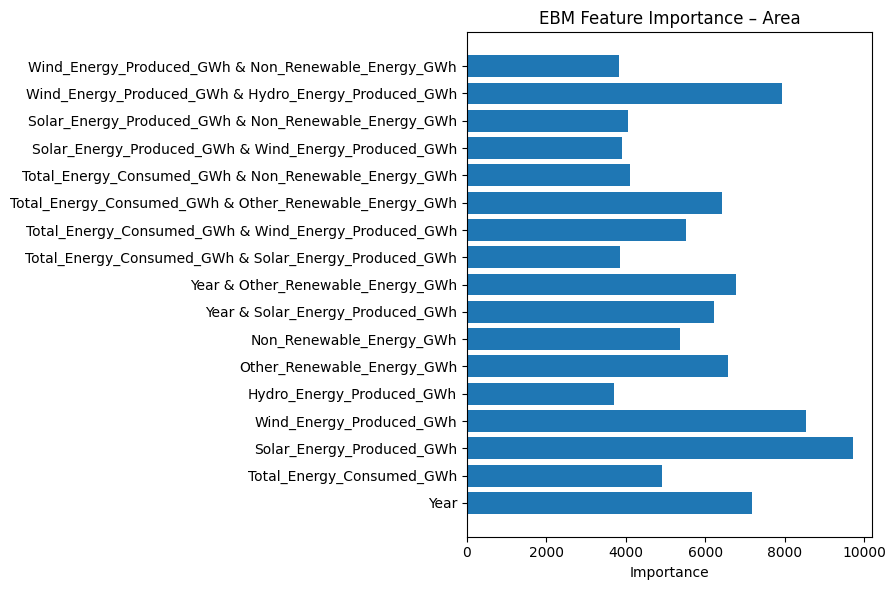

In [19]:
# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# EBM Model
# ==============================
ebm = ExplainableBoostingRegressor(
    random_state=42,
    max_bins=256,
    interactions=10
)

# Train
ebm.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
test_pred = ebm.predict(X_test)

# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("Explainable Boosting Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Global Explanation (EBM)
# ==============================
global_exp = ebm.explain_global()
show(global_exp)


# ==============================
# Feature Importance Plot (Static)
# ==============================
importances = global_exp.data()['scores']
features = global_exp.data()['names']

plt.figure(figsize=(9, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("EBM Feature Importance – Area")
plt.tight_layout()
plt.show()

# GAM - Generalized additive model

In [20]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 2.6 MB/s eta 0:00:00


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

GAM (Generalized Additive Model) – Area
RMSE: 252062.4450
MAE : 215563.7975
R²  : -0.0968

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     62.7971
Link Function:                     IdentityLink Log Likelihood:                                 -2736.3611
Number of Samples:                          200 AIC:                                             5600.3164
                                                AICc:                                            5661.4669
                                                GCV:                                     133985699121.4482
                                                Scale:                                         247671.7924
                                                Pseud

/tmp/ipython-input-1766839759.py:46: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




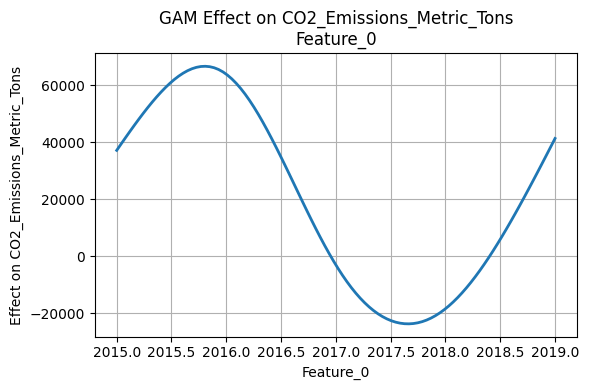

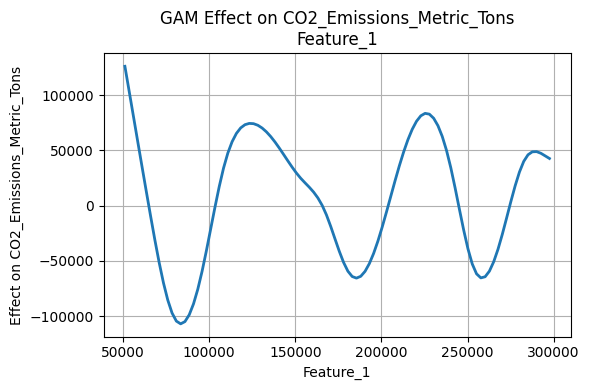

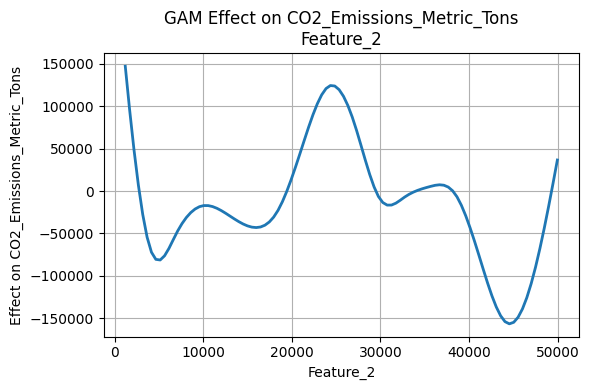

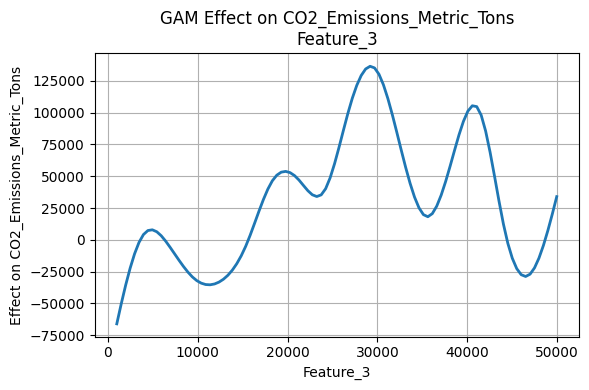

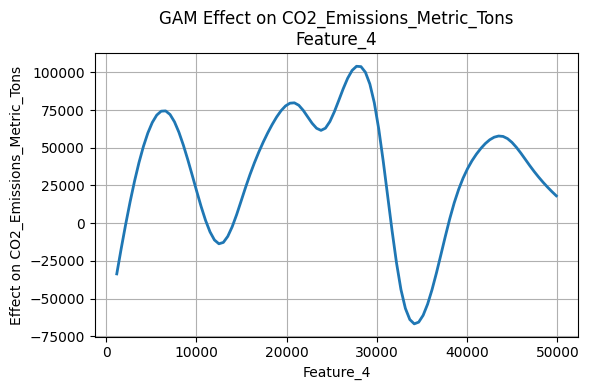

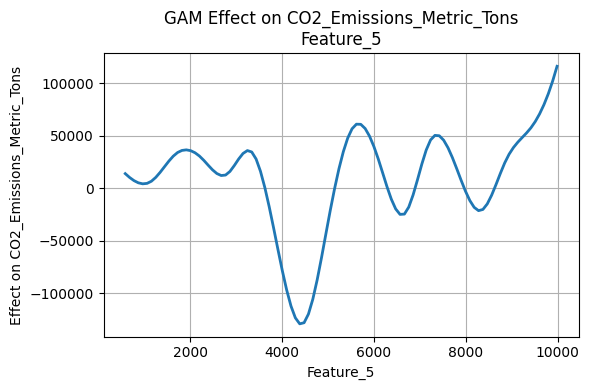

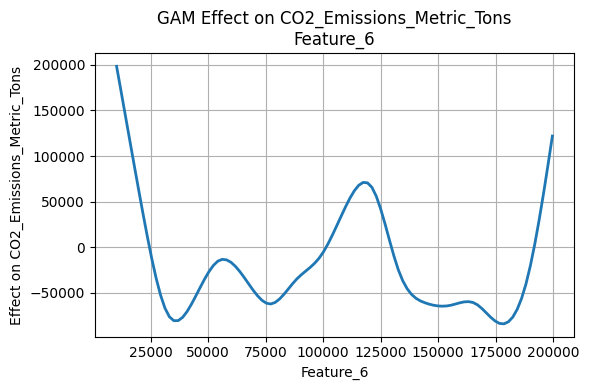

In [23]:
if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
    X = X.values
else:
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

y = y.values if hasattr(y, "values") else y

# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# Build GAM model
# ==============================
# Create terms properly
terms = s(0, n_splines=20)
for i in range(1, X_train.shape[1]):
    terms += s(i, n_splines=20)

gam = LinearGAM(terms).fit(X_train, y_train)

# ==============================
# Predict
# ==============================
test_pred = gam.predict(X_test)

# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("GAM (Generalized Additive Model) – Area")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}\n")

# ==============================
# Statistical Summary
# ==============================
gam.summary()

# ==============================
# Feature Effect / Partial Dependence Plots
# ==============================
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6, 4))
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), linewidth=2)
    plt.title(f"GAM Effect on CO2_Emissions_Metric_Tons\n{feature}")
    plt.xlabel(feature)
    plt.ylabel("Effect on CO2_Emissions_Metric_Tons")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

100% (11 of 11) |########################| Elapsed Time: 0:00:07 Time:  0:00:07
/tmp/ipython-input-3124539294.py:65: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 





GAM (Generalized Additive Model) – Area
Train RMSE : 244172.3785
Test  RMSE : 243893.8412
MAE        : 211486.9395
R²         : -0.0268

Model Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.8303
Link Function:                     IdentityLink Log Likelihood:                                  -2765.203
Number of Samples:                          200 AIC:                                             5562.0664
                                                AICc:                                            5564.9755
                                                GCV:                                      74232586341.4201
                                                Scale:                                         253

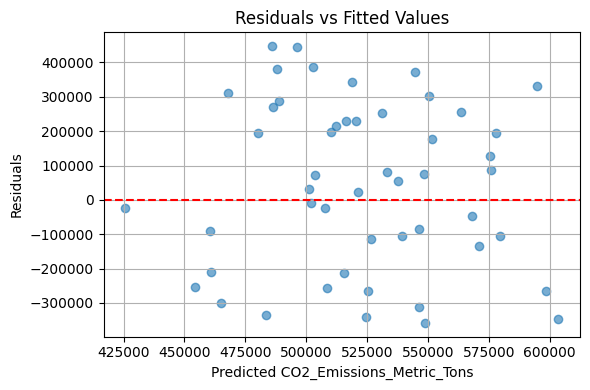

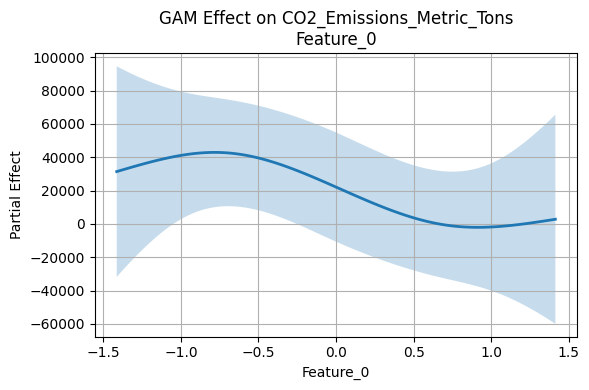

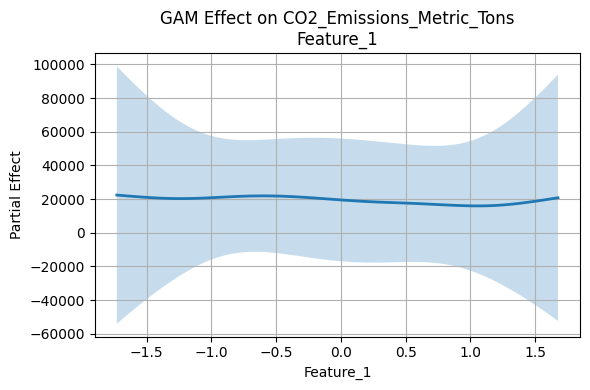

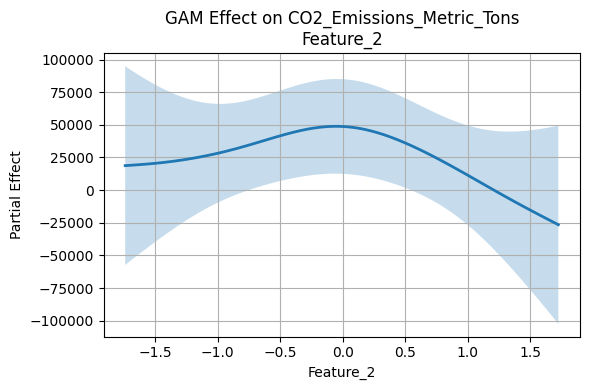

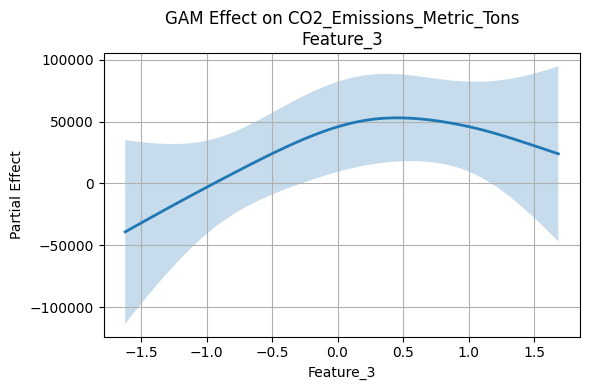

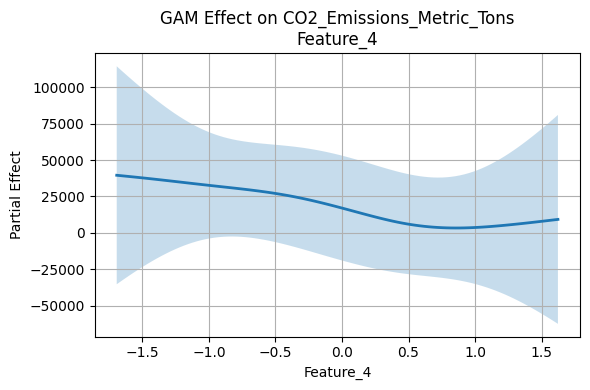

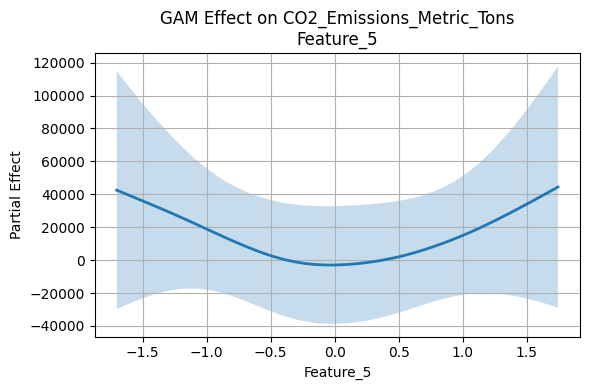

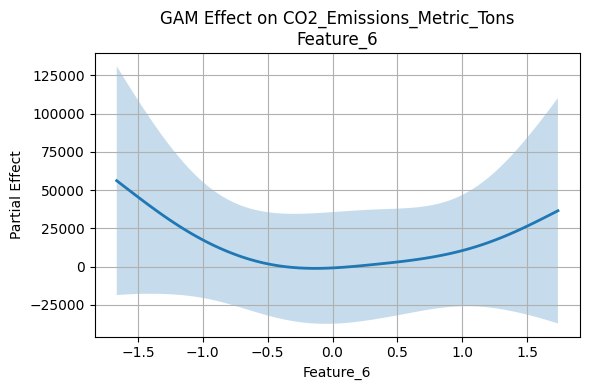


Optimal lambda values per term:
[[np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)]]


In [24]:
# ==============================
# Load / Prepare Data
# ==============================
# X can be pandas DataFrame OR numpy array
# y can be pandas Series OR numpy array

if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
    X = X.values
else:
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

y = y.values if hasattr(y, "values") else y

# ==============================
# Feature Scaling
# ==============================
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ==============================
# Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# Build GAM Terms
# ==============================
terms = s(0, n_splines=20)
for i in range(1, X_train.shape[1]):
    terms += s(i, n_splines=20)

# ==============================
# Train GAM (correct λ handling)
# ==============================
gam = LinearGAM(terms)
gam.gridsearch(X_train, y_train)

# ==============================
# Predictions
# ==============================
train_pred = gam.predict(X_train)
test_pred = gam.predict(X_test)

# ==============================
# Evaluation
# ==============================
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("\nGAM (Generalized Additive Model) – Area")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test  RMSE : {test_rmse:.4f}")
print(f"MAE        : {mae:.4f}")
print(f"R²         : {r2:.4f}")

# ==============================
# Model Summary
# ==============================
print("\nModel Summary:")
gam.summary()

# ==============================
# Residual Diagnostics
# ==============================
residuals = y_test - test_pred

plt.figure(figsize=(6, 4))
plt.scatter(test_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted CO2_Emissions_Metric_Tons")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================
# Partial Dependence Plots
# ==============================
for i, feature in enumerate(feature_names):

    plt.figure(figsize=(6, 4))

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.plot(XX[:, i], pdep, linewidth=2)
    plt.fill_between(
        XX[:, i],
        confi[:, 0],
        confi[:, 1],
        alpha=0.25
    )

    plt.title(f"GAM Effect on CO2_Emissions_Metric_Tons\n{feature}")
    plt.xlabel(feature)
    plt.ylabel("Partial Effect")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ==============================
# Optimal lambda values
# ==============================
print("\nOptimal lambda values per term:")
print(gam.lam)
